In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Path to raw data
data_path = 'Data/raw_data/'

In [3]:
def select_keywords_related_files(data_path, key_words):
    filenames = [filename for filename in os.listdir(data_path)]
    environment_filenames = list(filter(lambda filename: any(key_word in filename for key_word in key_words), filenames))
    environment_filepaths = list(map(lambda filename: os.path.join(data_path, filename), environment_filenames))
    return environment_filepaths

In [4]:
# Select all files which are related to climate change
environment_paths = select_keywords_related_files(data_path, key_words=['Environment','Emissions', 'Climate'])

In [5]:
food_paths = select_keywords_related_files(data_path, key_words=['Food'])
food_paths

['Data/raw_data/Food_Security_Data_E_All_Data_(Normalized).csv',
 'Data/raw_data/FoodSupply_LivestockFish_E_All_Data_(Normalized).csv',
 'Data/raw_data/Food_Aid_Shipments_WFP_E_All_Data_(Normalized).csv',
 'Data/raw_data/FoodSupply_Crops_E_All_Data_(Normalized).csv']

In [6]:
fao_paths = select_keywords_related_files(data_path, key_words=['fao'])
fao_paths

['Data/raw_data/fao_data_fertilizers_data.csv',
 'Data/raw_data/fao_data_crops_data.csv',
 'Data/raw_data/fao_data_forest_data.csv',
 'Data/raw_data/fao_data_production_indices_data.csv',
 'Data/raw_data/fao_data_land_data.csv']

In [7]:
fao_crops_df = pd.read_csv(fao_paths[1], encoding='latin-1')
fao_crops_df.element.unique()

array(['Area Harvested', 'Yield', 'Production Quantity', nan, 'Seed',
       'Gross Production 1999-2001 (1000 I$)',
       'Net Production 1999-2001 (1000 I$)', 'Gross PIN (base 1999-2001)',
       'Grs per capita PIN (base 1999-2001)', 'Net PIN (base 1999-2001)',
       'Net per capita PIN (base 1999-2001)'], dtype=object)

In [68]:
df_test = pd.read_csv(fao_paths[2], encoding='latin-1')
print(df_test.element.unique())
print(df_test.category.unique())

['Non-fertilizer use' 'Import Quantity' 'Export Quantity'
 'Production Quantity' 'Consumption' nan 'Import Value' 'Export Value'
 'Consumption in nutrients' 'Production in nutrients'
 'Import Quantity in nutrients' 'Non-fertilizer use in nutrients'
 'Export Quantity in nutrients']
['ammonia_anhydrous' 'ammonium_nitrate' 'ammonium_sulphate'
 'bleached_sulphate_pulp' 'bleached_sulphite_pulp'
 'calcium_ammonium_nitrate' 'case_materials' 'chemical_wood_pulp'
 'chips_and_particles' 'coated_papers' 'diammonium_phosphate_dap'
 'dissolving_wood_pulp' 'fibreboard' 'fibreboard_compressed'
 'folding_boxboard' 'forest_products' 'hardboard'
 'household_sanitary_paper' 'ind_rwd_wir_c' 'ind_rwd_wir_nc_other'
 'ind_rwd_wir_nc_tropica' 'industrial_roundwood' 'industrial_roundwood_c'
 'industrial_roundwood_nc' 'insulating_board' 'mdf' 'mechanical_wood_pulp'
 'monoammonium_phosphate_map' 'newsprint' 'nitrogen_n_total_nutrients'
 'npk_complex_10kg' 'other_fibre_pulp' 'other_indust_roundwd'
 'other_indust_

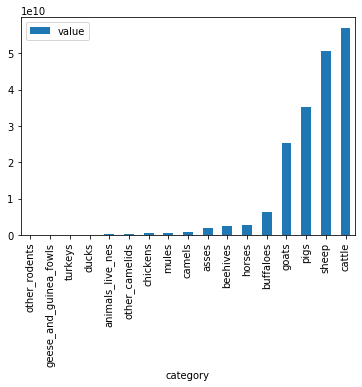

In [58]:
fao_fertilizer_df = pd.read_csv(fao_paths[0], encoding='latin-1')
world_animals = fao_fertilizer_df[fao_fertilizer_df.country_or_area == 'World +'][['value', 'category']]
world_animals.groupby('category', as_index=False).agg('sum').sort_values(by='value').plot.bar(x='category', y='value')

In [8]:
rice_prod_df = fao_crops_df[(fao_crops_df.category == 'rice_paddy') & (fao_crops_df.element == 'Production Quantity')]
rice_area_df = fao_crops_df[(fao_crops_df.category == 'rice_paddy') & (fao_crops_df.element == 'Area Harvested')]

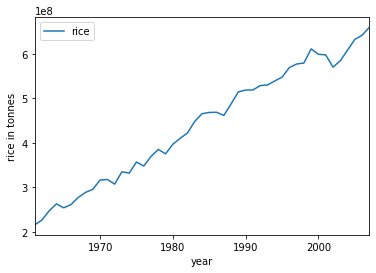

In [9]:
rice_prod_df[rice_prod_df.country_or_area == 'World +'][['year', 'value']].groupby('year').\
    agg(rice=('value', 'sum')).plot(label='rice')
plt.ylabel('rice in tonnes')
plt.legend()

In [10]:
continents = ['Africa +', 'Asia +', 'Americas +', 'Europe +', 'Oceania +']

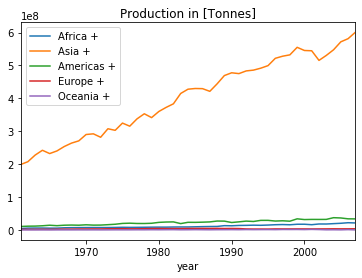

In [11]:
ax = plt.gca()
for continent in continents:
    rice_prod_df[rice_prod_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Production in [Tonnes]')

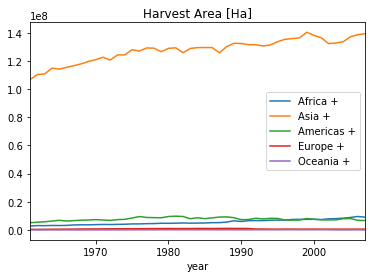

In [12]:
ax = plt.gca()
for continent in continents:
    rice_area_df[rice_area_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Harvest Area [Ha]')

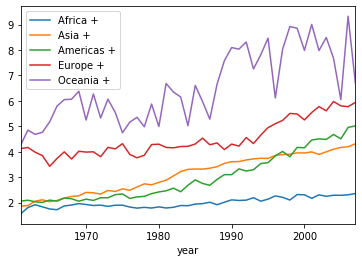

In [13]:
ax = plt.gca()
for continent in continents:
    efficiency_df = rice_prod_df[rice_prod_df.country_or_area == continent].groupby('year').agg('sum') / \
          rice_area_df[rice_area_df.country_or_area == continent].groupby('year').agg('sum')
    efficiency_df.plot(ax=ax)
    ax.legend(continents)

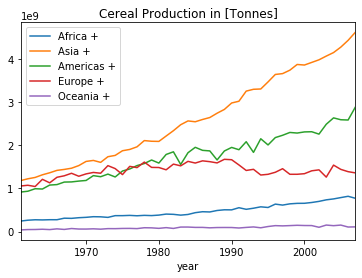

In [14]:
cereal_production_df = fao_crops_df[fao_crops_df.element == 'Production Quantity']
cereal_production_df = cereal_production_df[~cereal_production_df.category.str.contains('total')]
ax = plt.gca()
for continent in continents:
    cereal_production_df[cereal_production_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Cereal Production in [Tonnes]')

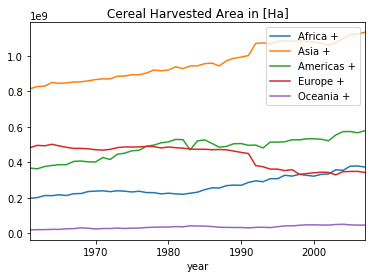

In [15]:
cereal_area_df = fao_crops_df[fao_crops_df.element == 'Area Harvested']
cereal_area_df = cereal_area_df[~cereal_area_df.category.str.contains('total')]
ax = plt.gca()
for continent in continents:
    cereal_area_df[cereal_area_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Cereal Harvested Area in [Ha]')

In [23]:
continent_production.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
94,Americas +,51,Production Quantity,2007.0,tonnes,53955.0,A,agave_fibres_nes
95,Americas +,51,Production Quantity,2006.0,tonnes,53955.0,A,agave_fibres_nes
96,Americas +,51,Production Quantity,2005.0,tonnes,53955.0,A,agave_fibres_nes
97,Americas +,51,Production Quantity,2004.0,tonnes,54951.0,A,agave_fibres_nes
98,Americas +,51,Production Quantity,2003.0,tonnes,52648.0,A,agave_fibres_nes


<Figure size 864x864 with 0 Axes>

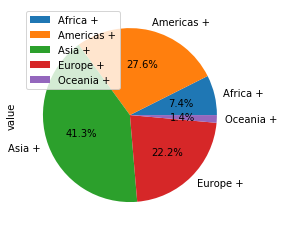

In [38]:
fig = plt.figure(figsize=(12, 12))
continent_production = cereal_production_df[(cereal_production_df.country_or_area.isin(continents)) & \
                                      (~cereal_production_df.category.str.contains('total'))]
continent_production[['country_or_area', 'value']].groupby('country_or_area').agg('sum')\
    .plot.pie(y='value', autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.show()

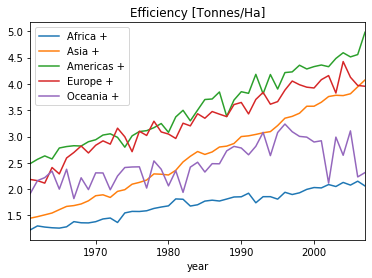

In [17]:
ax = plt.gca()
for continent in continents:
    efficiency_df = cereal_production_df[cereal_production_df.country_or_area == continent].groupby('year').agg('sum') / \
          cereal_area_df[cereal_area_df.country_or_area == continent].groupby('year').agg('sum')
    efficiency_df.plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Efficiency [Tonnes/Ha]')

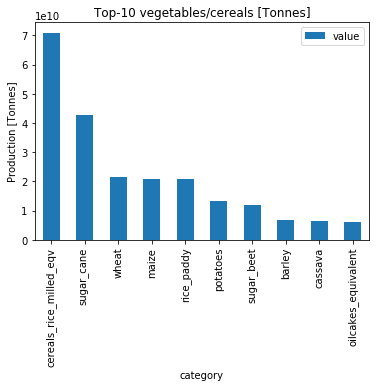

In [101]:
worlds_top_production = fao_crops_df[(fao_crops_df.country_or_area == 'World +') & \
                                     (fao_crops_df.element == 'Production Quantity')][['value', 'category']]
worlds_top_production = worlds_top_production[~worlds_top_production.category.str.contains('total')]
worlds_top_production = worlds_top_production.groupby('category', as_index=False).agg('sum').\
    sort_values(by='value', ascending=False).head(10)
worlds_top_production.plot.bar(x='category', y='value')
plt.title('Top-10 vegetables/cereals [Tonnes]')
plt.ylabel('Production [Tonnes]')
plt.show()

In [105]:
list(filter(lambda x: 'total' in x, fao_crops_df.category.unique()))

['cereals_total',
 'citrus_fruit_total',
 'coarse_grain_total',
 'fruit_excl_melons_total',
 'pulses_total',
 'roots_and_tubers_total',
 'treenuts_total',
 'vegetables_melons_total']

In [85]:
fao_crops_df.year.unique()

array([2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999.,
       1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990.,
       1989., 1988., 1987., 1986., 1985., 1984., 1983., 1982., 1981.,
       1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973., 1972.,
       1971., 1970., 1969., 1968., 1967., 1966., 1965., 1964., 1963.,
       1962., 1961.,   nan])